# Machine Learning project : Ariane ODONI, Maïa ROCA, Kylie WU (OCC3)

## Importing libraries and loading data

Data from Kaggle : https://www.kaggle.com/datasets/usmanshuaibumusa/cicids-17/code

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [ ]:
import kagglehub

# downloading files from kaggle
path = kagglehub.dataset_download("usmanshuaibumusa/cicids-17")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1


In [ ]:
# listing all the files
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Wednesday-workingHours.pcap_ISCX.csv
/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Friday-WorkingHours-Morning.pcap_ISCX.csv
/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Monday-WorkingHours.pcap_ISCX.csv
/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Tuesday-WorkingHours.pcap_ISCX.csv
/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


In [ ]:
Friday_Morning=pd.read_csv('/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Friday-WorkingHours-Morning.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Friday_Afternoon_PortScan=pd.read_csv('/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Friday_Afternoon_DDOS=pd.read_csv('/root/.cache/kagglehub/datasets/usmanshuaibumusa/cicids-17/versions/1/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',encoding='latin1',low_memory=False)


Let's concatenate the data :

In [ ]:
# list of DataFrames
dataframes = [Friday_Morning, Friday_Afternoon_PortScan, Friday_Afternoon_DDOS]

# getting the columns of each DataFrame as a set
column_sets = [set(df.columns) for df in dataframes]

# checking if all DataFrames have the same columns
all_columns_equal = all(column_sets[0] == cols for cols in column_sets)

if all_columns_equal:
    print("All datasets have the same columns.")
else:
    print("Datasets do not have the same columns.")
    for i, cols in enumerate(column_sets): # differences
        print(f"Columns in DataFrame {i+1}: {cols}")

All datasets have the same columns.


Each database has the same number of columns and the same column names. We can therefore concatenate all the databases to get an idea of ​​all the attacks that occurred during the day.

In [ ]:
allData = pd.concat([Friday_Morning, Friday_Afternoon_DDOS, Friday_Afternoon_PortScan])
allData.head(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-3268-56108-6,192.168.10.50,56108,192.168.10.3,3268,6,7/7/2017 8:59,112740690,32,16,...,32,3.594286e+02,1.199802e+01,380.0,343.0,16100000.0,4.988048e+05,16400000.0,15400000.0,BENIGN
1,192.168.10.3-192.168.10.50-389-42144-6,192.168.10.50,42144,192.168.10.3,389,6,7/7/2017 8:59,112740560,32,16,...,32,3.202857e+02,1.574499e+01,330.0,285.0,16100000.0,4.987937e+05,16400000.0,15400000.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/7/2017 9:00,113757377,545,0,...,0,9.361829e+06,7.324646e+06,18900000.0,19.0,12200000.0,6.935824e+06,20800000.0,5504997.0,BENIGN
3,192.168.10.9-224.0.0.252-63210-5355-17,192.168.10.9,63210,224.0.0.252,5355,17,7/7/2017 9:00,100126,22,0,...,32,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.9-224.0.0.22-0-0-0,192.168.10.9,0,224.0.0.22,0,0,7/7/2017 9:00,54760,4,0,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [ ]:
dataShape = allData.shape

print(f"Dimensions of Friday dataset: {dataShape[0]} rows, {dataShape[1]} columns")

Dimensions of Friday dataset: 703245 rows, 85 columns


We have the good numbers of rows in our database (sum of all the rows of the previous one). In our database, we have 703245 operations in our network traffic and 85 informations for each operations.

# Stage 1 : implementation of standard solution

### Analysis of the data and pre-processing

In [ ]:
# checking the quality
print(allData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 703245 entries, 0 to 286466
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       703245 non-null  object 
 1    Source IP                    703245 non-null  object 
 2    Source Port                  703245 non-null  int64  
 3    Destination IP               703245 non-null  object 
 4    Destination Port             703245 non-null  int64  
 5    Protocol                     703245 non-null  int64  
 6    Timestamp                    703245 non-null  object 
 7    Flow Duration                703245 non-null  int64  
 8    Total Fwd Packets            703245 non-null  int64  
 9    Total Backward Packets       703245 non-null  int64  
 10  Total Length of Fwd Packets   703245 non-null  int64  
 11   Total Length of Bwd Packets  703245 non-null  float64
 12   Fwd Packet Length Max        703245 non-null  in

In [ ]:
# statistical information
allData.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,703245.000000,703245.000000,703245.000000,7.032450e+05,703245.000000,703245.000000,7.032450e+05,7.032450e+05,703245.000000,703245.000000,...,703245.000000,703245.000000,7.032450e+05,7.032450e+05,7.032450e+05,7.032450e+05,7.032450e+05,7.032450e+05,7.032450e+05,7.032450e+05
mean,40631.123360,7962.735034,8.948389,1.056822e+07,6.735627,7.360662,5.596234e+02,1.072696e+04,253.342164,19.658897,...,4.571550,25.690055,9.656884e+04,2.812304e+04,1.483580e+05,8.104613e+04,5.030473e+06,1.231939e+06,5.904587e+06,4.132828e+06
std,21573.107419,17263.042486,4.876868,2.815051e+07,572.363391,771.589746,4.685555e+03,1.728003e+06,1132.537365,96.648907,...,545.328536,7.290533,7.082775e+05,3.293842e+05,9.830942e+05,6.578535e+05,1.582620e+07,7.536521e+06,1.854219e+07,1.463286e+07
min,0.000000,0.000000,0.000000,-1.300000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,30339.000000,53.000000,6.000000,6.800000e+01,1.000000,1.000000,2.000000e+00,6.000000e+00,2.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49952.000000,80.000000,6.000000,3.074500e+04,2.000000,1.000000,3.000000e+01,5.600000e+01,20.000000,2.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,57554.000000,3324.000000,17.000000,1.810259e+06,4.000000,4.000000,8.000000e+01,3.480000e+02,45.000000,31.000000,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,65532.000000,17.000000,1.200000e+08,207964.000000,284602.000000,1.235152e+06,6.270000e+08,24820.000000,2325.000000,...,198636.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08


We have 703 245 rows in our data base.

In [ ]:
# reduction -> checking null values
print(allData.isnull().sum().sum())

47


We observe that we have 47 missing values. We chose to delete the rows with the missing values rather than replacing them, because it's negligible compared to the total number of rows we have.

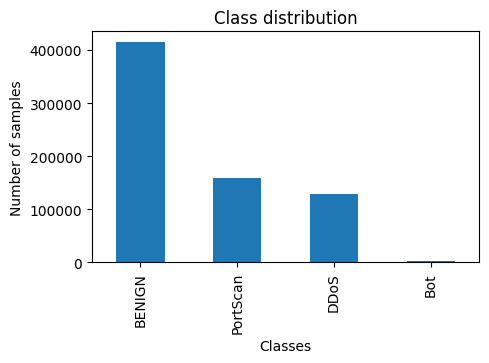

In [ ]:
# the coloumn 'Label' gives the nature of the attack
plt.figure(figsize=(5,3))
allData[' Label'].value_counts().plot(kind='bar')
plt.title('Class distribution')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.show()

We have 4 different types of labels. We observe that the majority are benign attacks. The most common malicious attacks are PortScan and DDoS, while Bot attacks are much less frequent in comparison.

We aim to train our model to determine whether an attack is benign or a real malicious attack. To do this, we assign a value of 0 to benign attacks and a value of 1 to malicious attacks.

In [ ]:
# transformation : BENIGN -> 0, everything else -> 1
allData[' Label'] = allData[' Label'].apply(lambda x: 0 if 'BENIGN' in x  else 1)

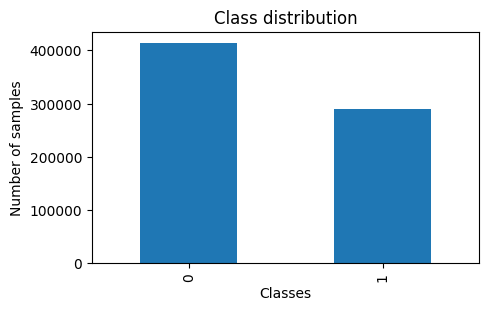

In [ ]:
# we have now a different figure :
plt.figure(figsize=(5,3))
allData[' Label'].value_counts().plot(kind='bar')
plt.title('Class distribution')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.show()

In order to work with the dataset, all column types must be either integers or floats.

In [ ]:
# creating a LabelEncoder
label_encoder = LabelEncoder()

# colums transformation
for column in ['Flow ID', ' Source IP', ' Destination IP']:
    allData[column] = label_encoder.fit_transform(allData[column].astype(str))

# transformation of the 'Timestamp' column into temporal elements
allData[' Timestamp'] = pd.to_datetime(allData[' Timestamp'], errors='coerce')
allData['Year'] = allData[' Timestamp'].dt.year
allData['Month'] = allData[' Timestamp'].dt.month
allData['Day'] = allData[' Timestamp'].dt.day
allData['Hour'] = allData[' Timestamp'].dt.hour
allData['Minute'] = allData[' Timestamp'].dt.minute
allData['Second'] = allData[' Timestamp'].dt.second
allData = allData.drop(columns=[' Timestamp'])

In [ ]:
# verification of the transformations
print(allData.dtypes)

Flow ID              int64
 Source IP           int64
 Source Port         int64
 Destination IP      int64
 Destination Port    int64
                     ...  
Month                int32
Day                  int32
Hour                 int32
Minute               int32
Second               int32
Length: 90, dtype: object


Each column type is now a number.

In [ ]:
allData.head(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Idle Std,Idle Max,Idle Min,Label,Year,Month,Day,Hour,Minute,Second
0,351979,2133,56108,2526,3268,6,112740690,32,16,6448,...,4.988048e+05,16400000.0,15400000.0,0,2017,7,7,8,59,0
1,352012,2133,42144,2526,389,6,112740560,32,16,6448,...,4.987937e+05,16400000.0,15400000.0,0,2017,7,7,8,59,0
2,396681,6860,0,7958,0,0,113757377,545,0,0,...,6.935824e+06,20800000.0,5504997.0,0,2017,7,7,9,0,0
3,392012,2136,63210,3472,5355,17,100126,22,0,616,...,0.000000e+00,0.0,0.0,0,2017,7,7,9,0,0
4,392007,2136,0,3470,0,0,54760,4,0,0,...,0.000000e+00,0.0,0.0,0,2017,7,7,9,0,0


In [ ]:
# calculation of the correlation matrix with the 'Label' column
corr_matrix = allData.corr()[[' Label']].drop(' Label')
corr_matrix = corr_matrix.sort_values(by=' Label', ascending=False)

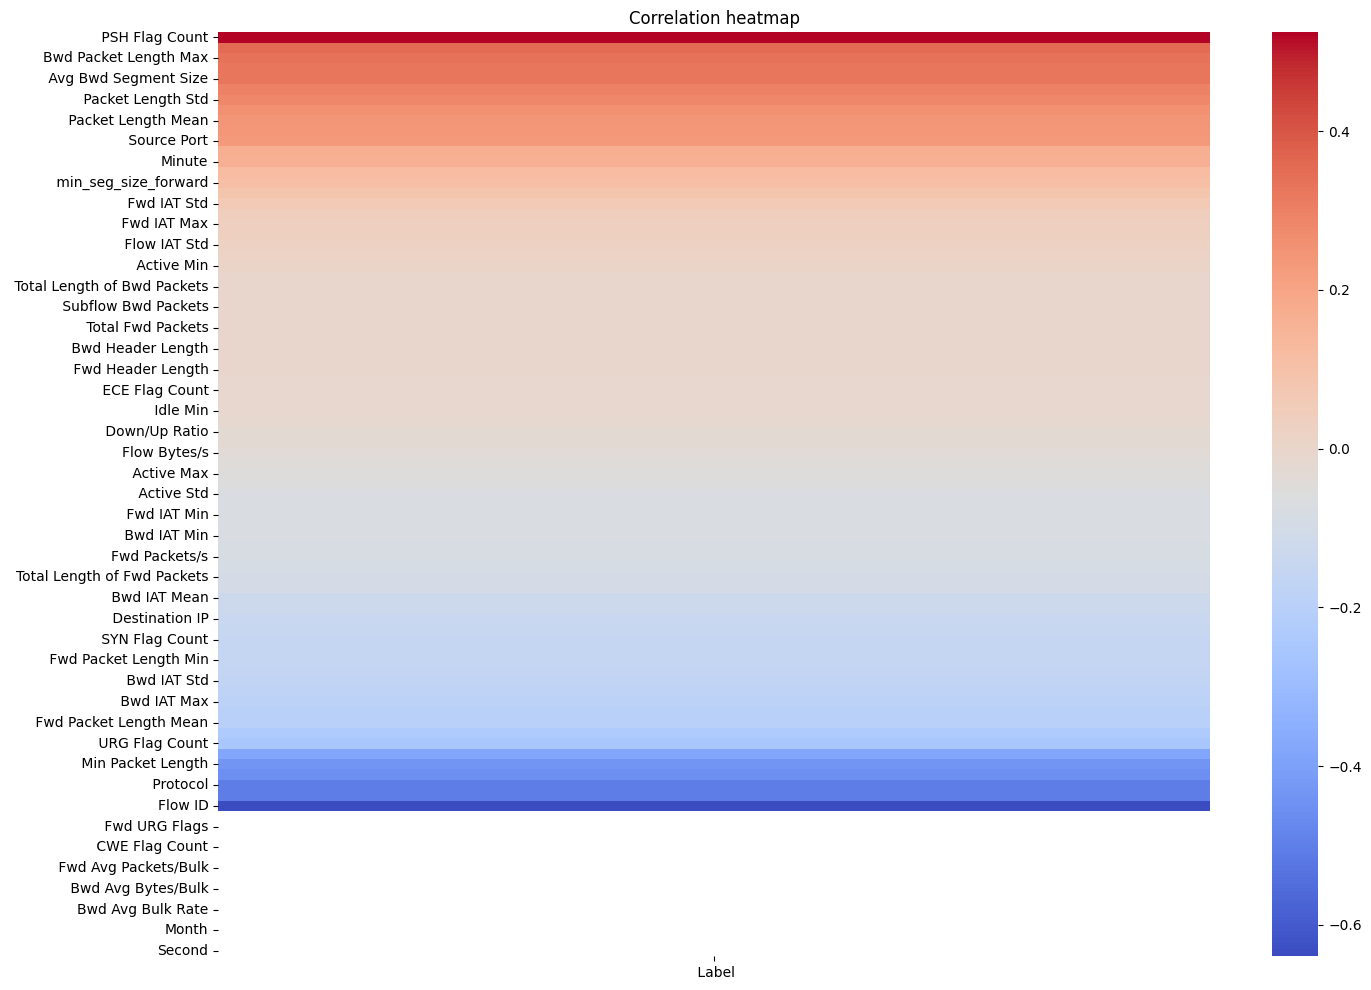

In [ ]:
# heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
# let's look at the values in numeric form, as the heatmap matrix is not very readable
pd.set_option('display.max_rows', None)
print(corr_matrix)
pd.reset_option('display.max_rows')

                                 Label
 PSH Flag Count               0.524526
 Bwd Packet Length Std        0.354756
Bwd Packet Length Max         0.334079
 Bwd Packet Length Mean       0.328557
 Avg Bwd Segment Size         0.328557
 Packet Length Variance       0.300253
 Packet Length Std            0.279786
 Max Packet Length            0.256667
 Packet Length Mean           0.243356
 Average Packet Size          0.242505
 Source Port                  0.231508
Init_Win_bytes_forward        0.168899
Minute                        0.163765
 Bwd Packets/s                0.123453
 min_seg_size_forward         0.108979
 Idle Std                     0.083538
 Fwd IAT Std                  0.063213
 Idle Max                     0.038482
 Fwd IAT Max                  0.036270
 Flow IAT Max                 0.033240
 Flow IAT Std                 0.026349
Idle Mean                     0.017112
 Active Min                   0.010111
 Subflow Bwd Bytes           -0.003601
 Total Length of Bwd Pack

We notice that several columns have no correlation with the 'Label' column (NaN). We decide to delete them as they do not contribute to determining the severity of the attack. Additionally, we decide to remove all columns with an absolute correlation value below 0.1, as they will have little impact on determining the type of attack.

In [ ]:
low_corr = 0.1  # chosen value of minimum absolute correlation
# retrieve the values related to 'Label'
corr_label = corr_matrix[' Label']
nan_columns = corr_label[corr_label.isna()].index
low_corr_columns = corr_label[corr_label.abs() < low_corr].index

# checking for NaN values
print("\nColumns with NaN in the correlation:")
print(nan_columns)

# checking for absolute correlations below 0.1
print("\nColumns with an absolute correlation below the threshold (0.1):")
print(low_corr_columns)


Columns with NaN in the correlation:
Index([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count',
       'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Year', 'Month', 'Day', 'Second'],
      dtype='object')

Columns with an absolute correlation below the threshold (0.1):
Index([' Idle Std', ' Fwd IAT Std', ' Idle Max', ' Fwd IAT Max',
       ' Flow IAT Max', ' Flow IAT Std', 'Idle Mean', ' Active Min',
       ' Subflow Bwd Bytes', ' Total Length of Bwd Packets',
       ' act_data_pkt_fwd', ' Subflow Bwd Packets', ' Total Backward Packets',
       ' Total Fwd Packets', 'Subflow Fwd Packets', ' Bwd Header Length',
       ' Fwd Header Length.1', ' Fwd Header Length', 'Active Mean',
       ' ECE Flag Count', ' RST Flag Count', ' Idle Min', ' Flow IAT Mean',
       ' Down/Up Ratio', ' Flow IAT Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Active Max', ' Fwd IAT 

In [ ]:
# combining the 2 groups of columns to remove
columns_to_remove = nan_columns.union(low_corr_columns)

# new cleaned database
allData_stage1 = allData.drop(columns=columns_to_remove)
allData_stage1.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Label,Hour,Minute
0,351979,2133,56108,2526,3268,6,403,0,201.5,204.724205,...,0,166.729167,201.5,72.0,377,2079,32,0,8,59
1,352012,2133,42144,2526,389,6,403,0,201.5,204.724205,...,0,248.062500,201.5,316.0,955,2079,32,0,8,59
2,396681,6860,0,7958,0,0,0,0,0.0,0.000000,...,0,0.000000,0.0,0.0,-1,-1,0,0,9,0
3,392012,2136,63210,3472,5355,17,28,28,28.0,0.000000,...,0,29.272727,28.0,0.0,-1,-1,32,0,9,0
4,392007,2136,0,3470,0,0,0,0,0.0,0.000000,...,0,0.000000,0.0,0.0,-1,-1,0,0,9,0


We now have a well-sorted database, we can proceed with training.

### Training and testing the dataset

#### 1. Spliting the dataset

In [ ]:
X_stage1 = allData_stage1.drop(' Label', axis=1)  # features
y_stage1 = allData_stage1[' Label']  # target variable

# separating train and test variable (80% train, 20% test)
X_train_stage1, X_test_stage1, y_train_stage1, y_test_stage1 = train_test_split(X_stage1, y_stage1, test_size=0.2, random_state=42)

#### 2. First algorithm : Naive Bayes



This probabilistic classification algorithm based on Bayes' theorem operates under the assumption that the features used for classification are conditionally independent given the class label.

In [ ]:
# naive bayes
nb_model_stage1 = GaussianNB()
nb_model_stage1.fit(X_train_stage1, y_train_stage1)
nb_pred_stage1 = nb_model_stage1.predict(X_test_stage1)
print("Naive Bayes accuracy:", accuracy_score(y_test_stage1, nb_pred_stage1))
print(classification_report(y_test_stage1, nb_pred_stage1))

Naive Bayes accuracy: 0.6744875541240961
              precision    recall  f1-score   support

           0       0.98      0.46      0.62     82652
           1       0.56      0.99      0.71     57997

    accuracy                           0.67    140649
   macro avg       0.77      0.72      0.67    140649
weighted avg       0.81      0.67      0.66    140649



The Naive Bayes model predicts 98% of benign attacks and 56% for malicious attacks, indicating that it accurately predicts a high proportion of benign data but struggles to reliably identify malicious attacks. The recall for benign attacks is only 46%, whereas it reaches 99% for malicious attacks, demonstrating that the model prioritizes the detection of malicious attacks but fails to correctly classify a significant number of benign ones. The F1-score, which provides a balance between precision and recall, is 71% for malicious attacks. While this score is better than random classification, it is insufficient for practical use.

The underperformance of the Naive Bayes model can be attributed to its assumption of feature independence, which is rarely true in real-world cybersecurity data. This limitation prevents the model from capturing complex dependencies between features, which are crucial for accurately identifying attacks. Additionally, the model struggles with imbalanced datasets, as prior probabilities tend to dominate its predictions. And rare features disproportionately affect the model’s output, leading to a high rate of false positives.

#### 3. Second algorithm : Logistic regression



It predicts the probability that a given input belongs to a particular category, typically represented as 0 or 1. The model analyzes the relationship between one or more independent variables and the binary outcome variable, allowing it to classify data into distinct categories.

In [ ]:
# logistic regression
lr_model_stage1 = LogisticRegression(random_state=42)
lr_model_stage1.fit(X_train_stage1, y_train_stage1)
lr_pred_stage1 = lr_model_stage1.predict(X_test_stage1)
print("Logistic Regression Accuracy:", accuracy_score(y_test_stage1, lr_pred_stage1))
print(classification_report(y_test_stage1, lr_pred_stage1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9776251519740631
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     82652
           1       0.96      0.99      0.97     57997

    accuracy                           0.98    140649
   macro avg       0.97      0.98      0.98    140649
weighted avg       0.98      0.98      0.98    140649



In [ ]:
lr_model_stage1.score(X_train_stage1, y_train_stage1)

0.9777762372999452

The Logistic Regression model demonstrates excellent performance, achieving an overall accuracy of 97.76%. It maintains a high level of precision, with 99% for benign attacks and 96% for malicious attacks, indicating that the model reliably predicts both categories. The recall is equally impressive, with 97% for benign attacks and 99% for malicious attacks, showcasing the model's ability to correctly identify most instances of both classes. The F1-score, which balances precision and recall, is 98% for benign attacks and 97% for malicious attacks. This metric confirms that the model handles the imbalance between the two classes effectively.

Only 1% of benign attacks and 3% of malicious attacks are misclassified, making Logistic Regression significantly more efficient than the Naive Bayes model. This model provides a well-distributed and robust performance, with minimal errors, but let's see with the next algorithm.

#### 4. Third algorithm : Random Forest



It's an ensemble learning method used for classification and regression tasks. It operates by constructing multiple decision trees during training and outputs the mode (for classification) or mean prediction (for regression) of the individual trees.

##### First result

In [ ]:
# Random forest
rf_model_stage1 = RandomForestClassifier(random_state=42)
rf_model_stage1.fit(X_train_stage1, y_train_stage1)
rf_pred_stage1 = rf_model_stage1.predict(X_test_stage1)
print("Random Forest Accuracy:", accuracy_score(y_test_stage1, rf_pred_stage1))
print(classification_report(y_test_stage1, rf_pred_stage1))

Random Forest Accuracy: 0.9999573406138685
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82652
           1       1.00      1.00      1.00     57997

    accuracy                           1.00    140649
   macro avg       1.00      1.00      1.00    140649
weighted avg       1.00      1.00      1.00    140649



The Random Forest model achieves very high performance, with an accuracy of 99.99%. Both precision and recall are perfect at 1.00 for benign and malicious attacks, resulting in an F1-score of 1.00 for both classes. These results suggest that the model has correctly classified nearly all instances, showing a near-flawless distribution.

However, the extreme nature of these results strongly indicates that the model may be overfitting. Overfitting occurs when the model "memorizes" the training data instead of learning patterns that can generalize to new, unseen data. Several factors might contribute to this overfitting :
- dataset specificity : the CICIDS17 dataset contains simulated attacks, which may make it too easy for the model to distinguish between normal traffic and malicious activity
- data leakage : certain features in the dataset may inadvertently reveal the label, providing the model with unintended shortcuts to achieve high accuracy

Although the model's results are impressive, further investigation is needed to confirm its robustness. We may look at cross-validation and reducing feature leakage, or reducing the depth to ensure the model's generalizability.

##### Verifying overfitting

To improve the model and reduce overfitting, we can try a cross-validation to obtain a more robust estimatation of the model's performance :

In [ ]:
cv_scores = cross_val_score(rf_model_stage1, X_stage1, y_stage1, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.98602194 0.99997867 0.99980092 0.99968005 0.9998578 ]
Mean CV score: 0.9970678781932328


The mean score of approximately 99.71% underlines the model's overall effectiveness. And all the 5 values of cross validation are similar, it's not a sign of overfitting.

If the cross-value date is heterogeneous, it's often a sign of overfitting.

Now, let's see the ratio between the number of correct predictions and the total number of predictions :

In [ ]:
rf_model_stage1.score(X_train_stage1, y_train_stage1)

1.0

The ratio is 1 so the model correctly classifies all the test values. Let's see a report of the training data classification and another of the test data, to see if the results are the same.

In [ ]:
y_pred_train = rf_model_stage1.predict(X_train_stage1)
y_pred_test = rf_model_stage1.predict(X_test_stage1)

print("Report on training data :")
print(classification_report(y_train_stage1, y_pred_train))

print("Raport on test data :")
print(classification_report(y_test_stage1, y_pred_test))

Report on training data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331670
           1       1.00      1.00      1.00    230926

    accuracy                           1.00    562596
   macro avg       1.00      1.00      1.00    562596
weighted avg       1.00      1.00      1.00    562596

Raport on test data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82652
           1       1.00      1.00      1.00     57997

    accuracy                           1.00    140649
   macro avg       1.00      1.00      1.00    140649
weighted avg       1.00      1.00      1.00    140649



We see that the result of train and test rapports are pretty similar, so either our data are :
- perfectly separated : it is possible if we have a very high dependance between one feature and our label
- overfitting : it is possible if our model is too complex, if our model memorizes too fastly (random forest big depth) or if our separation between test and train are not separated very well.

Let's see the result of a random forest classifier with a small depth :

In [ ]:
# Random forest
rf_model_2 = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_model_2.fit(X_train_stage1, y_train_stage1)
rf_pred_stage1 = rf_model_2.predict(X_test_stage1)
print("Random forest accuracy:", accuracy_score(y_test_stage1, rf_pred_stage1))
print(classification_report(y_test_stage1, rf_pred_stage1))

Random forest accuracy: 0.9999360109208029
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82652
           1       1.00      1.00      1.00     57997

    accuracy                           1.00    140649
   macro avg       1.00      1.00      1.00    140649
weighted avg       1.00      1.00      1.00    140649



Even with small depth, our score is very high, so the overfitting hypothesis is less and less likely.

To be sure that the model is not overfitting, let's see the dependance between features and label.

##### PCA with Random forest

We will use PCA to know if the results are due to overfitting :

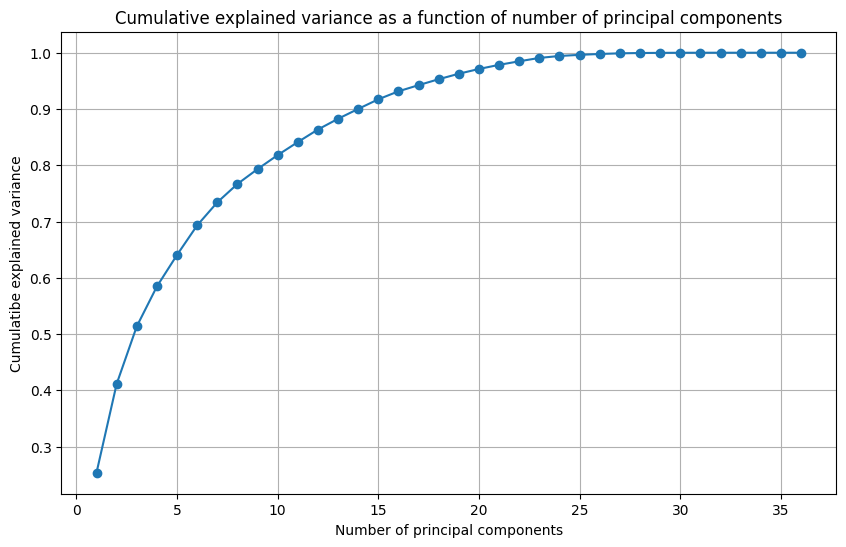

Number of components optimal to explain 95% of the variance : 18
Shape after PCA : (703245, 18)


In [ ]:
# separating data (X) from target (y)
X = allData_stage1.drop(columns=[' Label'])
y = allData_stage1[' Label']

# Standardized data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# idea of the variance
explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Cumulative explained variance as a function of number of principal components')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulatibe explained variance')
plt.grid()
plt.show()

# number of components to have 95% of the variance explained
n_components = (explained_variance >= 0.95).argmax() + 1
print(f"Number of components optimal to explain 95% of the variance : {n_components}")

# reduction of the data
pca_optimal = PCA(n_components=n_components)
X_pca_reduced = pca_optimal.fit_transform(X_scaled)

# new shape of the data
print(f"Shape after PCA : {X_pca_reduced.shape}")


We reduced our dataset to 18 components.


In [ ]:
# separating train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# prediction on the test set
y_pred = rf_model.predict(X_test)

# calculatating the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the dataset test : {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy on the dataset test : 0.9998364723531629
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82652
           1       1.00      1.00      1.00     57997

    accuracy                           1.00    140649
   macro avg       1.00      1.00      1.00    140649
weighted avg       1.00      1.00      1.00    140649



Even with PCA, we obtain high accuracy despite having fewer parameters (0.9998364723531629). So we will re-evaluate the dataset to ensure we're still not overfitting.

##### Re-evaluation of the data

In [ ]:
# normalizing data
X_normalized = MinMaxScaler().fit_transform(X_stage1)

# calculating chi² scores
chi_scores, p_values = chi2(X_normalized, y_stage1)
important_features = pd.Series(chi_scores, index=X_stage1.columns).sort_values(ascending=False)
print("Chi² scores :")
print(important_features)
print(X_stage1.shape)

Chi² scores :
 PSH Flag Count             107685.622343
 URG Flag Count              41937.097527
Flow ID                      41387.450636
Hour                         41143.278481
Bwd Packet Length Max        34331.783240
 Bwd Packet Length Std       30901.062551
 Protocol                    28025.419041
Bwd IAT Total                26491.006332
 Packet Length Std           21694.442976
 Packet Length Variance      21611.979562
 Bwd Packet Length Mean      20727.696666
 Avg Bwd Segment Size        20727.696666
 SYN Flag Count              16213.137970
Fwd PSH Flags                16213.137970
 Packet Length Mean          13544.694105
 Average Packet Size         13257.804873
 Bwd IAT Max                 10834.773470
 Max Packet Length           10443.078132
 Destination Port             8809.159975
 Bwd Packet Length Min        7795.605019
 Source IP                    6949.939544
 Init_Win_bytes_backward      6939.412995
Init_Win_bytes_forward        6665.920730
 Source Port        

We see that PSH Flag Count has a very high score; its result may be highly correlated with the label result. PSH flag count dominating the chi-square score is a sign of overfitting.


In [ ]:
correlations = allData_stage1.corr()  # confusion matrix
correlation_with_label = correlations[' Label'].sort_values(ascending=False)
print(correlation_with_label)

 Label                      1.000000
 PSH Flag Count             0.524526
 Bwd Packet Length Std      0.354756
Bwd Packet Length Max       0.334079
 Bwd Packet Length Mean     0.328557
 Avg Bwd Segment Size       0.328557
 Packet Length Variance     0.300253
 Packet Length Std          0.279786
 Max Packet Length          0.256667
 Packet Length Mean         0.243356
 Average Packet Size        0.242505
 Source Port                0.231508
Init_Win_bytes_forward      0.168899
Minute                      0.163765
 Bwd Packets/s              0.123453
 min_seg_size_forward       0.108979
 Bwd IAT Mean              -0.126434
 Init_Win_bytes_backward   -0.130110
 Destination IP            -0.142118
 Destination Port          -0.148100
 SYN Flag Count            -0.154412
Fwd PSH Flags              -0.154412
 Fwd Packet Length Min     -0.156667
 Fwd Packet Length Std     -0.157531
 Bwd IAT Std               -0.170585
 Fwd Packet Length Max     -0.179466
 Bwd IAT Max               -0.185694
 

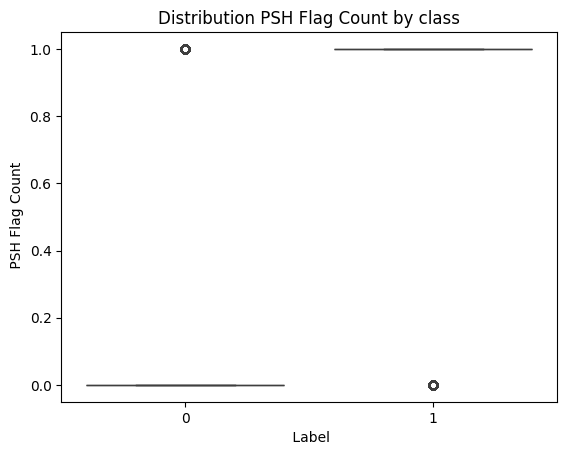

In [ ]:
# distribution of PSH flag count by class
sns.boxplot(x=y_stage1, y=X_stage1[' PSH Flag Count'])
plt.title('Distribution PSH Flag Count by class')
plt.show()

In [ ]:
importances = rf_model_stage1.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print("Most important features :", X_stage1.columns[sorted_indices[:10]])

Most important features : Index([' Source IP', 'Flow ID', ' Destination IP', ' Fwd Packet Length Mean',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Max', ' Source Port',
       ' Average Packet Size', 'Init_Win_bytes_forward', ' PSH Flag Count'],
      dtype='object')


The PSH flag is well distributed between labels, but its correlation score is not very high (0,5), and it being the last of the 10 most important features is not a strong sign of overfitting.


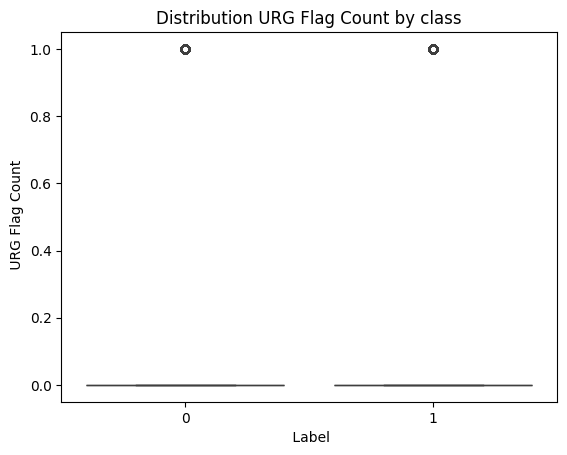

In [ ]:
sns.boxplot(x=y_stage1, y=X_stage1[' URG Flag Count'])
plt.title('Distribution URG Flag Count by class')
plt.show()

The data are not well separated so it can be a cause of overfitting

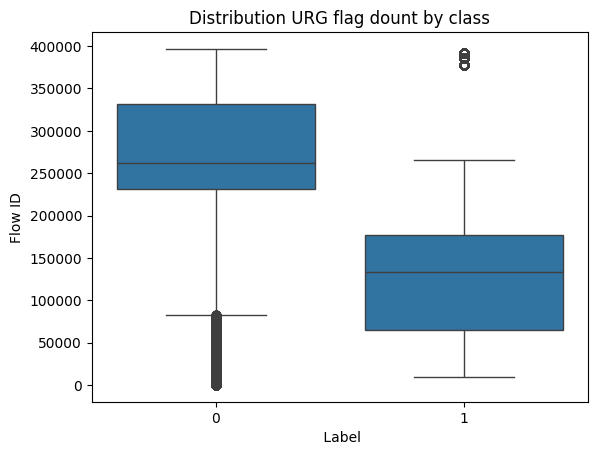

In [ ]:
sns.boxplot(x=y_stage1, y=X_stage1['Flow ID'])
plt.title('Distribution URG flag dount by class')
plt.show()

URG flag's distribution is much better distributed, so we can just delete PSH flag count and URG flag count from our X data and see if the overfitting is reduced.


In [ ]:
# delete PSH and URG flag count
X_stage1_reduced = X_stage1.drop(columns=[' PSH Flag Count'])
rf_model_reduced = RandomForestClassifier(random_state=42)
scores_reduced = cross_val_score(rf_model_reduced, X_stage1_reduced, y_stage1, cv=5)
print("Scores after suppression :", scores_reduced)

Scores after suppression : [0.98601483 0.99997867 0.9992819  1.         0.99972982]


The scores are the same as before, so there is no overfitting. Therefore, we have another problem. We will verify that the dataset is not too well-organized, as this could make the learning process too easy.

##### Verification data leakage

In [ ]:
X = allData_stage1.drop(columns=[' Label'])  # features
y = allData_stage1[' Label']  # target

# generating synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# strict cross-validation with k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold with rigorous shuffling
model = RandomForestClassifier(random_state=42)

# store scores to verify stability
cv_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train) # train the model on the training data

    # evaluation on the test data
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    cv_scores.append(score)

    # displaying a classification report for each fold
    print(f"Fold report :\n{classification_report(y_test, y_pred)}")

print(f"\nCross-validation - Average accuracy : {np.mean(cv_scores):.4f}")
print(f"Scores for each fold : {cv_scores}")

# checking shuffling and splitting
# performing a train/test split with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# training the model on the shuffled data
model.fit(X_train, y_train)

# evaluation on the test data
y_pred = model.predict(X_test)
print("\nEvaluation after shuffling and splitting ")
print(classification_report(y_test, y_pred))


Fold report :
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

Fold report :
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.85      0.85      0.85        93

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

Fold report :
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        97
           1       0.95      0.92      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.9

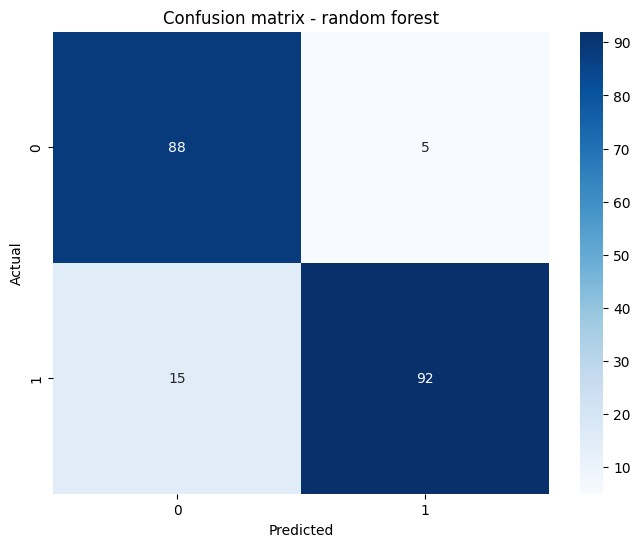

In [ ]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

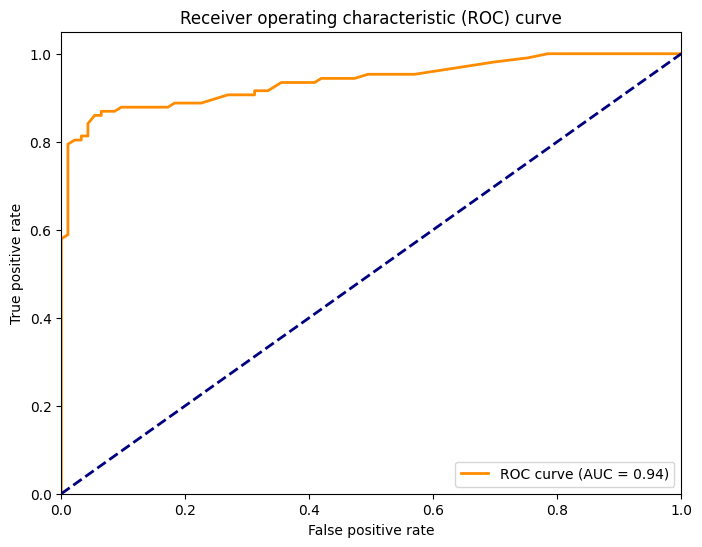

In [ ]:
#ROC curve (illustrates the trade-off between true positive rate and false positive rate)

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

The results suggest that the issue was caused by data leakage. In the initial dataset, the data was overly organized, leading to a form of information leakage. To address this, the data must be shuffled properly before training the models to prevent such leaks.

The high performance observed in previous evaluations may not reflect the true effectiveness of the models, as the results were influenced by this leakage. As we move to Stage 2, it will be essential to reevaluate the models under more rigorous conditions, ensuring that the training and testing data are properly separated and shuffled. This will provide a more accurate assessment of the models' capabilities.


# Stage 2 : improving the standard solution

In [ ]:
X_stage2 = allData_stage1.drop(columns=[' Label'])  # features
y_stage2 = allData_stage1[' Label']  # target

# generating synthetic data
X_stage2, y_stage2 = make_classification(n_samples=703245,n_features=20, n_classes=2, random_state=42)

Our new dataset is so far a mix over all of the data in order to have more logical scores.
The old data was too tidy, the algorithm learned too quickly, and the results were skewed.



### Re-evaluation of the 2 algorithms from stage 1 without data leakage

#### For Naive Bayes

In [ ]:
# strict cross-validation with k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold with rigorous shuffling
model = GaussianNB()

# store scores to verify stability
cv_scores = []

for train_index, test_index in kf.split(X_stage2):
    X_train_stage2, X_test_stage2 = X_stage2[train_index], X_stage2[test_index]
    y_train_stage2, y_test_stage2 = y_stage2[train_index], y_stage2[test_index]

    model.fit(X_train_stage2, y_train_stage2) # train the model on the training data

    # evaluation on the test data
    y_pred_stage2 = model.predict(X_test_stage2)
    score_stage2 = accuracy_score(y_test_stage2, y_pred_stage2)
    cv_scores.append(score_stage2)

    # displaying a classification report for each fold
    print(f"Fold report :\n{classification_report(y_test_stage2, y_pred_stage2)}")

print(f"\nCross-validation - Average accuracy : {np.mean(cv_scores):.4f}")
print(f"Scores for each fold : {cv_scores}")

# performing a train/test split with shuffling
X_train_stage2, X_test_stage2, y_train_stage2, y_test_stage2 = train_test_split(X_stage2, y_stage2, test_size=0.2, random_state=42, shuffle=True)

# training the model on the shuffled data
model.fit(X_train_stage2, y_train_stage2)

# evaluation on the test data
y_pred_stage2 = model.predict(X_test_stage2)
print("\nEvaluation after shuffling and splitting ")
print(classification_report(y_test_stage2, y_pred_stage2))

Fold report :
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     70563
           1       0.92      0.93      0.92     70086

    accuracy                           0.92    140649
   macro avg       0.92      0.92      0.92    140649
weighted avg       0.92      0.92      0.92    140649

Fold report :
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     70097
           1       0.92      0.93      0.92     70552

    accuracy                           0.92    140649
   macro avg       0.92      0.92      0.92    140649
weighted avg       0.92      0.92      0.92    140649

Fold report :
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     70138
           1       0.92      0.93      0.92     70511

    accuracy                           0.92    140649
   macro avg       0.92      0.92      0.92    140649
weighted avg       0.92      0.9

So in Stage 1, we had 67%. Thanks to this re-evaluation without data leakage, we now achieve 92%. This result shows that cross-validation with a rigorous split allows for a better performance evaluation of the model.

The Naive Bayes model can therefore adapt if the data is better distributed than in our initial dataset, which was too 'well-organized' for the model to learn optimally.

Furthermore, regarding the scores for each fold : [0.9236112592339796, 0.9229500387489424, 0.9229500387489424, 0.9238956551415225, 0.9235757097455367], there is almost no overfitting since the results are very similar for each fold, around 0.923.

#### For logistic regression

In [ ]:
model = LogisticRegression(random_state=42)

# store scores to verify stability
cv_scores = []

for train_index, test_index in kf.split(X_stage2):
    X_train_stage2, X_test_stage2 = X_stage2[train_index], X_stage2[test_index]
    y_train_stage2, y_test_stage2 = y_stage2[train_index], y_stage2[test_index]

    model.fit(X_train_stage2, y_train_stage2) # train the model on the training data

    # evaluation on the test data
    y_pred_stage2 = model.predict(X_test_stage2)
    score_stage2 = accuracy_score(y_test_stage2, y_pred_stage2)
    cv_scores.append(score_stage2)

    # displaying a classification report for each fold
    print(f"Fold report :\n{classification_report(y_test_stage2, y_pred_stage2)}")

print(f"\nCross-validation - Average accuracy : {np.mean(cv_scores):.4f}")
print(f"Scores for each fold : {cv_scores}")

# checking shuffling and splitting
# performing a train/test split with shuffling
X_train_stage2, X_test_stage2, y_train_stage2, y_test_stage2 = train_test_split(X_stage2, y_stage2, test_size=0.2, random_state=42, shuffle=True)

# training the model on the shuffled data
model.fit(X_train_stage2, y_train_stage2)

# evaluation on the test data
y_pred_stage2 = model.predict(X_test_stage2)
print("\nEvaluation after shuffling and splitting ")
print(classification_report(y_test_stage2, y_pred_stage2))


Fold report :
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     70563
           1       0.92      0.92      0.92     70086

    accuracy                           0.92    140649
   macro avg       0.92      0.92      0.92    140649
weighted avg       0.92      0.92      0.92    140649

Fold report :
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     70097
           1       0.92      0.92      0.92     70552

    accuracy                           0.92    140649
   macro avg       0.92      0.92      0.92    140649
weighted avg       0.92      0.92      0.92    140649

Fold report :
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     70138
           1       0.92      0.92      0.92     70511

    accuracy                           0.92    140649
   macro avg       0.92      0.92      0.92    140649
weighted avg       0.92      0.9

So in Stage 1, we had 98%, whereas after re-evaluation with this model, we achieved 92%. The previous model was too overfitted because the data was too well-organized (the high performance observed in previous evaluations didn't reflect the true effectiveness of the models, as the results were influenced by this leakage). In contrast, here, since the data is more shuffled, the model is less precise but more realistic.

Now, we will attempt to improve the performance of the models by adjusting the hyperparameters.

### Ajustment of the hyperparameters

#### For Naive Bayes

Naive Bayes relies on strict assumptions regarding the distribution of features (such as feature independence). We will try to adjust the var_smoothing : this parameter adds a small value to the variance of the features to prevent very low variance values, which can improve the stability of the model.

Default value : 1e-9

Possible adjustments : different values such as 1e-6, 1e-3, 1e-1, etc.

In [ ]:
# defining the hyperparameter search grid
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-6, 1e-3, 1e-1, 1]}

nb_model = GaussianNB()

# performing cross-validation grid search
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_stage2, y_train_stage2)

# to have the best parameters and cross-validation score
print("Best parameters : ", grid_search.best_params_)
print("Best cross-validation score : {:.4f}".format(grid_search.best_score_))
print(f"\nCross-validation - average accuracy : {np.mean(cv_scores):.4f}")

cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']  # mean validation scores for each hyperparameter combination
std_test_scores = cv_results['std_test_score']   # standard deviation of validation scores

print("\nValidation scores for each parameter :")
for param, mean_score, std_score in zip(cv_results['params'], mean_test_scores, std_test_scores):
    print(f"{param} : mean accuracy = {mean_score:.4f}, std = {std_score:.4f}")

Best parameters :  {'var_smoothing': 1e-10}
Best cross-validation score : 0.9233

Cross-validation - average accuracy : 0.9221

Validation scores for each parameter :
{'var_smoothing': 1e-10} : mean accuracy = 0.9233, std = 0.0004
{'var_smoothing': 1e-09} : mean accuracy = 0.9233, std = 0.0004
{'var_smoothing': 1e-06} : mean accuracy = 0.9233, std = 0.0004
{'var_smoothing': 0.001} : mean accuracy = 0.9233, std = 0.0004
{'var_smoothing': 0.1} : mean accuracy = 0.9219, std = 0.0005
{'var_smoothing': 1} : mean accuracy = 0.9158, std = 0.0005


We notice that changing the parameter either lowers the score or keeps it the same. Therefore, we choose the default parameter for the remainder of our work.

#### For Logistic regression

Hyperparameters we can adjust :

- C (inverse of regularization strength) : regularization is crucial to prevent overfitting. A small C indicates strong regularization, while a large C means weaker regularization.

Default value : 1.0

Possible adjustments : values like 0.001, 0.1, 10, or 100

- solver : the choice of solver can affect the model's performance depending on the size and nature of the data.

Default value : lbfgs

Possible adjustments : solvers like liblinear, or newton-cg, for smaller datasets, or saga for larger and more complex datasets

- max_iter : the maximum number of iterations for solving the optimization problem. Sometimes models fail to converge, so increasing max_iter can help if convergence is slow.

Default value : 100

Possible adjustments : values like 200, 300, or even more if necessary

- penalty : the regularization penalty to apply. Options are l2 (more commonly used) and l1 (when stronger regularization is desired).

Default value : l2

Possible adjustments : l1 for more aggressive regularization or a combination of both


*Reducing the dataset size to get an idea of the results without taking too long*

In [ ]:
X_redu = allData_stage1.drop(columns=[' Label'])  # features
y_redu = allData_stage1[' Label']  # target

# generating synthetic data
X_redu, y_redu = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# strict cross-validation with k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# train split
X_train_redu, X_test_redu, y_train_redu, y_test_redu = train_test_split(X_redu, y_redu, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]}

lr_model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(lr_model, param_grid, cv=5)
grid_search.fit(X_train_redu, y_train_redu)

print("Best parameters : ", grid_search.best_params_)
print("Best Cross-validation score : {:.4f}".format(grid_search.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters :  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation score : 0.8750


The optimization of the parameters allowed us to improve from 86% to 87.5%. This change involved adjusting C from 1 to 0.1, setting l1 for a more aggressive regularization, and using liblinear as the solver. Although our dataset contains a large number of entries, they are not that complex.

#### For Random forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200], # number of trees
    'max_depth': [None, 10, 20, 30], # depth of the trees
    'min_samples_split': [2, 5, 10], # minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # minimum number of samples in a leaf
    'max_features': ['sqrt', 'log2'], # number of features to use
    'bootstrap': [True, False] } # whether to sample with replacement

# configuring GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model_stage1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, error_score='raise' )

# training the grid search
grid_search_rf.fit(X_train_redu, y_train_redu)

print("Best parameters : ", grid_search_rf.best_params_)
print("Best Cross-validation score : ", grid_search_rf.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters :  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation score :  0.9037500000000002


We went from 0.89 to 0.90, which is roughly the same.

Thus, adjusting the hyperparameters has optimized the models individually, with moderate gains in some cases (mainly for logistic regression and random forest). However, these adjustments do not lead to radical changes in the performance of the models.

### Ensemble learning

The aim here is to rigorously compare the performance of two or more machine learning models using statistical tests. We will try to determine if the differences in model performance are statistically significant, or if they could be due to random variations in the data.

Ensemble learning allows combining multiple models to improve performance compared to a single model. The errors of individual models can cancel each other out, resulting in a more stable and accurate overall performance.

#### Use of Voting Classifier

The Voting Classifier combines multiple models into one, using either a 'hard' approach (majority voting) or a 'soft' approach (average probabilities).

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# creation of the models
clf1 = GaussianNB()
clf2 = LogisticRegression(max_iter=100, C=0.1, penalty='l1', solver='liblinear')
clf3 = RandomForestClassifier(
    bootstrap=False, max_depth=10, max_features='sqrt',
    min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# creation of a Voting Classifier model, using the "soft" strategy (probabilities)
voting_clf = VotingClassifier(
    estimators=[('Naive_bayes', clf1), ('Logistic_regression', clf2), ('Random_forest', clf3)],
    voting='soft',  # using mean probabilities
    weights=[1, 1, 2] ) # weights for each model in the final deciision

# training
voting_clf.fit(X_train_stage2, y_train_stage2)

VotingClassifier(estimators=[('Naive_bayes', GaussianNB()),
                             ('Logistic_regression',
                              LogisticRegression(C=0.1, penalty='l1',
                                                 solver='liblinear')),
                             ('Random_forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=10))],
                 voting='soft', weights=[1, 1, 2])

In [ ]:
# evaluation of the performance on the training set
y_pred_voting = voting_clf.predict(X_test_stage2)
accuracy_voting = accuracy_score(y_test_stage2, y_pred_voting)
print(f"Precision of the model Voting Classifier : {accuracy_voting:.4f}")

Precision of the model Voting Classifier : 0.9672


We get 0.9672, which is a much better result.

In order to plot the shape boundary of the model Voting Classifier :

In [ ]:
# reduction of the dimensions to 2D with PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_stage2)
X_test_2D = pca.transform(X_test_stage2)

In [ ]:
# training the Voting Classifier model
voting_clf.fit(X_train_2D, y_train_stage2)

# creation of a grid for the predictions
h = .02  # step/pace for the grid
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1

xx_vc, yy_vc = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# prediction of the classes for each point of the grid
Z_vc = voting_clf.predict(np.c_[xx_vc.ravel(), yy_vc.ravel()])
Z_vc = Z_vc.reshape(xx_vc.shape)

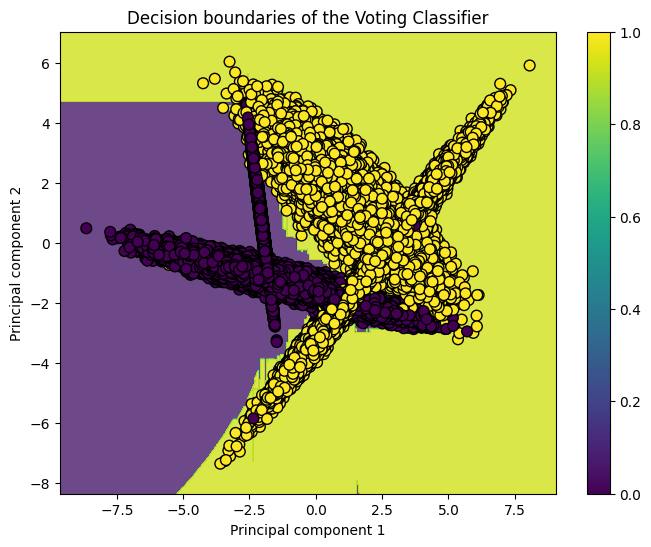

In [ ]:
# plotting the shape boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx_vc, yy_vc, Z_vc, alpha=0.8)

plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train_stage2, edgecolors='k', marker='o', s=60)
plt.title("Decision boundaries of the Voting Classifier")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.colorbar()

#### Use of Bagging (Bootstrap Aggregating)

Bagging is another ensemble learning method that involves training multiple models on subsets of data obtained by bootstrapping (sampling with replacement). Each model is then aggregated to make a final prediction.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# creating a base model (here, a decision tree)
dt_clf = DecisionTreeClassifier(max_depth=4)

# creating a BaggingClassifier with 200 decision trees and bootstrap sampling
bagging_clf = BaggingClassifier(
    estimator=dt_clf,
    n_estimators=200, # nb of models (trees)
    max_samples=100, # nb of samples for each tree
    bootstrap=True, # use of bootstrap
    random_state=42)

# training the Bagging model on the training data
bagging_clf.fit(X_train_stage2, y_train_stage2)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                  max_samples=100, n_estimators=200, random_state=42)

In [ ]:
# testing the Bagging model
y_pred_bagging = bagging_clf.predict(X_test_stage2)
accuracy_bagging = accuracy_score(y_test_stage2, y_pred_bagging)
print(f"Precision of the Bagging model : {accuracy_bagging:.4f}")

Precision of the Bagging model : 0.9685


We get 0.9685, which is a high score too.

In order to plot the shape boundary of the model Bagging (Bootstrap Aggregating) :

In [ ]:
# training the Bagging model
bagging_clf.fit(X_train_2D, y_train_stage2)

xx_ba, yy_ba = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# prediction of the classes for each point of the grid
Z_ba = bagging_clf.predict(np.c_[xx_ba.ravel(), yy_ba.ravel()])
Z_ba = Z_ba.reshape(xx_ba.shape)

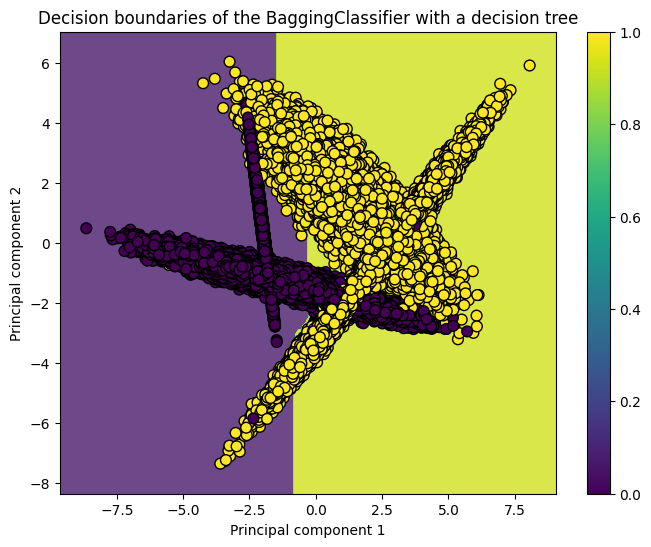

In [ ]:
# plotting the shape boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx_ba, yy_ba, Z_ba, alpha=0.8)

plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train_stage2, edgecolors='k', marker='o', s=60)
plt.title("Decision boundaries of the BaggingClassifier with a decision tree")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.colorbar()
plt.show()

#### Comparison of the models

In [ ]:
models = [clf1, clf2, clf3, voting_clf, bagging_clf]
model_names = ['Naive Bayes', 'Logistic regression', 'Random forest', 'Voting classifier', 'Bagging classifier']

for model, name in zip(models, model_names):
    model.fit(X_train_stage2, y_train_stage2) # training the model
    y_pred = model.predict(X_test_stage2) # doing the predictions
    accuracy = accuracy_score(y_test_stage2, y_pred) # computing the accuracy score
    print(f"Accuracy of the model {name}: {accuracy:.4f}")

Accuracy of the model Naive Bayes: 0.9236
Accuracy of the model Logistic regression: 0.9227
Accuracy of the model Random forest: 0.9829
Accuracy of the model Voting classifier: 0.9640
Accuracy of the model Bagging classifier: 0.9685


To conclude, the comparison of our algorithms with a coherent dataset, optimized hyperparameters, and ensemble learning techniques gives more than satisfactory results.

The Random Forest model proves to be the most effective, with an accuracy of 98.3%. However, it may not always be the preferred choice for quick tests due to its relatively long execution time.

The ensemble learning models take the strengths of each of our algorithms, which is why we would opt for the Voting model so far. It demonstrates the best decision boundaries and the accuracy of our two models are remarkably similar.

# Stage 3 : more improvements, “more and more"

## CNN (as a test)

For a first look at a deep learning algorithm, let's see how it goes with Convolutional Neural Networks (CNNs). For a Neural Network, we might reference papers like “ImageNet Classification with Deep Convolutional Networks” by Alex Krizhevsky et al.

### Implementation

1. Since the data are not images, we have to restructure them to adapt them for a CNN :

In [ ]:
# reshaping data to 2D
X_reshaped = X_stage2.reshape(X_stage2.shape[0], -1, 1)

# spliting the data
X_train_stage3, X_test_stage3, y_train_stage3, y_test_stage3 = train_test_split(X_reshaped, y_stage2, test_size=0.2, random_state=42)

2. Use of Keras to build the CNN model :

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_stage3.shape[1], 1)), # first 1D convolutional layer
    MaxPooling1D(pool_size=2), # max pooling layer to reduce dimensionality
    Conv1D(filters=32, kernel_size=3, activation='relu'), # second 1D convolutional layer
    MaxPooling1D(pool_size=2), # another max pooling layer
    Flatten(), # flattening the data for the dense layers
    Dense(64, activation='relu'),  # dense layer with 64 neurons and ReLU activation function
    Dropout(0.5), # dropout layer to reduce overfitting (50% of neurons randomly deactivated)
    Dense(1, activation='sigmoid') ]) #output layer with 1 neuron and sigmoid activation function (for binary classifcation)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Training the model :

- epochs = 8 means that the model will train on the whole dataset 8 times (10 is a bit too long to load, 8 seems a good middle ground)
- batch_size = 32 indicates that the model will treat 32 samples at the same time before updating its parameters, by default
- validation_split = 0.2 specifies that 20% of the training data will be used as validation sets, by default

In [ ]:
history = model.fit(X_train_stage3, y_train_stage3, epochs=8, batch_size=32, validation_split=0.2)

Epoch 1/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.9480 - loss: 0.1428 - val_accuracy: 0.9764 - val_loss: 0.0752
Epoch 2/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.9721 - loss: 0.0846 - val_accuracy: 0.9776 - val_loss: 0.0713
Epoch 3/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.9737 - loss: 0.0814 - val_accuracy: 0.9797 - val_loss: 0.0692
Epoch 4/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9745 - loss: 0.0794 - val_accuracy: 0.9801 - val_loss: 0.0665
Epoch 5/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9747 - loss: 0.0765 - val_accuracy: 0.9801 - val_loss: 0.0660
Epoch 6/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.9762 - loss: 0.0751 - val_accuracy: 0.9808 - val_loss: 0.0662
Epoch 7/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9778 - loss: 0.0731 - val_accuracy: 0.9808 - val_loss: 0.0657
Epoch 8/8
14065/14065 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9781 -

<14min d'exécution

### Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_stage3, y_test_stage3)
print(f"Test accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report
y_pred_stage3 = (model.predict(X_test_stage3) > 0.5).astype("int32")
print(classification_report(y_test_stage3, y_pred_stage3))

4396/4396 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9814 - loss: 0.0663
Test accuracy: 0.9807
4396/4396 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     70563
           1       0.97      0.99      0.98     70086

    accuracy                           0.98    140649
   macro avg       0.98      0.98      0.98    140649
weighted avg       0.98      0.98      0.98    140649



Plotting model accuracy and loss :

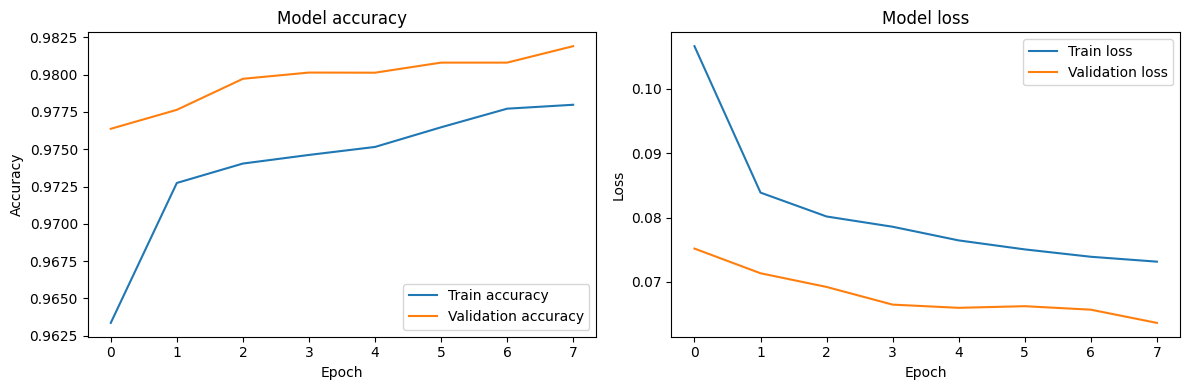

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Comparison with previous results

In [ ]:
results = {'Naive Bayes': 0.9236,
    'Logistic regression': 0.9227,
    'Random forest': 0.9830,
    'Voting classifier': 0.9645,
    'Bagging classifier': 0.9685,
    'CNN': accuracy }

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Naive Bayes: 0.9236
Logistic regression: 0.9227
Random forest: 0.9830
Voting classifier: 0.9645
Bagging classifier: 0.9685
CNN: 0.9807


Therefore, we obtain a satisfactory result, but it still remains below the value obtained with random forest. As a final step, let's try another deep learning algorithm.

## GBM

With Gradient Boosting Machines (GBM) : we are considering XGBoost, with the paper “XGBoost: A Scalable Tree Boosting System” by Tianqi Chen and Carlos Guestrin (https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf)

XGBoost, developed by Tianqi Chen and Carlos Guestrin, represents a significant advancement in machine learning algorithms, particularly for tree boosting. This algorithm was chosen here for its exceptional performance and scalability in handling complex classification and prediction tasks.

The paper introduces several key innovations that makes XGBoost stand out :
- Weighted quantile sketch : the authors introduce an innovative approach called the weighted quantile sketch. This technique allows the algorithm to efficiently handle data points with different importance levels during the tree-building process. By doing so, it effectively manages imbalanced datasets, where some classes may be underrepresented. This feature is particularly useful in real-world scenarios where data is often skewed or unevenly distributed across categories.
- Cache-aware access : the algorithm is designed with a deep understanding of how computer memory works. It organizes data and computations in a way that maximizes the use of the computer's cache memory. This smart data arrangement minimizes the time spent waiting for data to be fetched from slower memory sources. As a result, XGBoost can process information much faster, leading to significantly reduced training times compared to traditional algorithms.
- Blocks for out-of-core computation : XGBoost has a clever way of handling datasets that are too large to fit into a computer's main memory. It breaks down the data into smaller, manageable chunks that can be processed separately. This approach, known as out-of-core computation, allows the algorithm to work with massive datasets even on standard desktop computers. It's like solving a huge puzzle piece by piece, making XGBoost highly scalable and capable of tackling big data problems without requiring supercomputers.
- Distributed and parallel computing : XGBoost is built to take full advantage of modern computing environments. It can split its work across multiple processors on a single machine or even across a network of computers. This distributed approach allows XGBoost to process enormous datasets (potentially billions of data points) with remarkable speed and efficiency. By dividing the workload, it can accomplish in hours what might take days or weeks with traditional methods, all while using computing resources efficiently.

The effectiveness of XGBoost has been widely recognized in numerous machine learning competitions and real-world applications. As said in this paper and in "Network Intrusion Detection with XGBoost" by Arnaldo Gouveia & Miguel Correia (https://www.dpss.inesc-id.pt/~mpc/pubs/XGBoost_chapter.pdf), for instance, among 29 challenge-winning solutions published on Kaggle's blog in 2015, 17 used XGBoost. Its success spans various domains, including store sales prediction, high energy physics event classification, web text classification, and malware detection. It consistently outperforms other boosting implementations in terms of computation time and prediction accuracy. Its ability to handle large-scale datasets and complex classification tasks makes it particularly well-suited for network intrusion detection, where processing large volumes of data efficiently is crucial.

Thus, XGBoost's scalability and performance improvements over existing solutions make it an excellent choice for our project. It runs more than ten times faster than popular alternatives on a single machine and scales effectively to large datasets in distributed or settings where memory is limited. This combination of speed, scalability, and accuracy justifies its selection for our Stage 3 improvements in this machine learning project.

### Implementation

In [ ]:
import xgboost as xgb

# preparation of the data
X_train_stage3, X_test_stage3, y_train_stage3, y_test_stage3 = train_test_split(X_stage2, y_stage2, test_size=0.2, random_state=42)

# creaton of the model and training
model = xgb.XGBClassifier(
    n_estimators=100, # by default
    learning_rate=0.1,
    max_depth=5, # by default
    random_state=42)
model.fit(X_train_stage3, y_train_stage3)

# predictions
y_pred_stage3 = model.predict(X_test_stage3)

### Evaluation

In [ ]:
# accuracy calculation
accuracy = accuracy_score(y_test_stage3, y_pred_stage3)
print(f"Accuracy of the model XGBoost : {accuracy:.4f}")

# detailed classfication report
print(classification_report(y_test_stage3, y_pred_stage3))

# feature importance
feature_importance = model.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Caracteristic {i}: {importance}")

Accuracy of the model XGBoost : 0.9833
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     70563
           1       0.98      0.99      0.98     70086

    accuracy                           0.98    140649
   macro avg       0.98      0.98      0.98    140649
weighted avg       0.98      0.98      0.98    140649

Caracteristic 0: 0.000581165833864361
Caracteristic 1: 0.00046200811630114913
Caracteristic 2: 0.0006784233846701682
Caracteristic 3: 0.0007498062332160771
Caracteristic 4: 0.14791133999824524
Caracteristic 5: 0.000688771135173738
Caracteristic 6: 0.0005753347650170326
Caracteristic 7: 0.0005942390998825431
Caracteristic 8: 0.0005966810858808458
Caracteristic 9: 0.000546070805285126
Caracteristic 10: 0.0006203574012033641
Caracteristic 11: 0.0038224991876631975
Caracteristic 12: 0.0006499083247035742
Caracteristic 13: 0.0006714747287333012
Caracteristic 14: 0.000712417415343225
Caracteristic 15: 0.0005552678485400975
Caracteri

### Comparison with previous results

In [ ]:
results = {'Naive Bayes': 0.9236,
    'Logistic regression': 0.9227,
    'Random forest': 0.9830,
    'Voting classifier': 0.9645,
    'Bagging classifier': 0.9685,
    'XGBoost': accuracy }

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Naive Bayes: 0.9236
Logistic regression: 0.9227
Random forest: 0.9830
Voting classifier: 0.9645
Bagging classifier: 0.9685
XGBoost: 0.9833


We finally get a higher value with XGBoost now, the highest one among all the models implemented here.

Bars plots to compare the accuracies of the models :

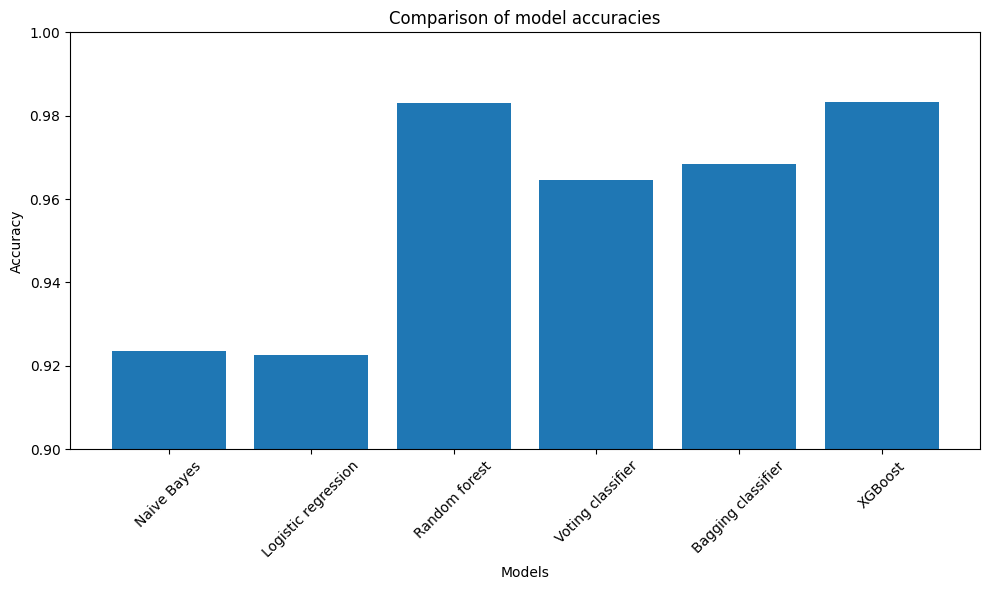

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Comparison of model accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

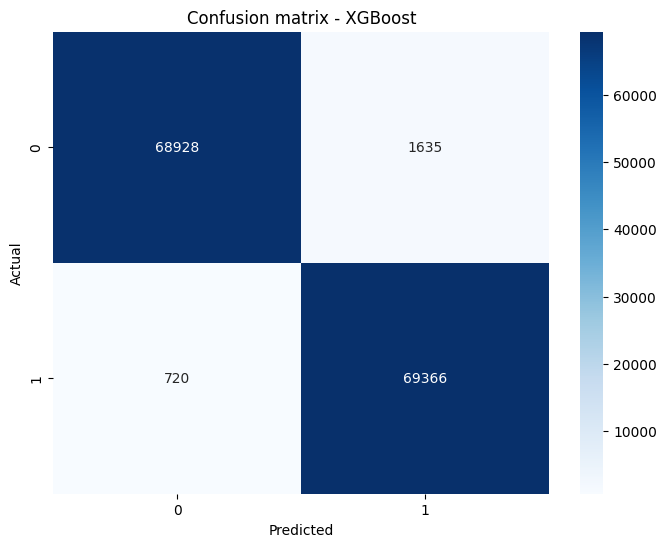

In [ ]:
cm = confusion_matrix(y_test_stage3, y_pred_stage3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ultimately, the progression through different algorithms has demonstrated the importance of model selection and optimization in achieving high accuracy for this machine learning project.

While traditional algorithms like Naive Bayes (0.9236) and Logistic Regression (0.9227) performed well, they were significantly outperformed by more advanced ensemble methods, thanks to combining multiple learners to enhance predictive accuracy and robustness.

XGBoost emerged as the top-performing model with an impressive accuracy of 0.9833, slightly surpassing the Random Forest model (0.9830). This marginal improvement highlights the effectiveness of gradient boosting techniques in capturing complex patterns within the data.

In conclusion, our Stage 3 analysis has successfully identified XGBoost as the most effective model for our network intrusion detection task. The marginal improvement over Random Forest suggests that we've approached the upper limit of performance for traditional machine learning models on this dataset. This project has demonstrated the value of a systematic approach to model selection and the power of ensemble methods in tackling complex classification problems in cybersecurity.

(total execution time : 1h30 )